# Final Project – Introduction to Machine Learning (Group 32)
## Loan Approval Prediction – Binary Classification
**Tamar & Tala – Spring 2025**

This notebook walks through our end-to-end machine learning project:
- Data exploration 
- Feature processing 
- Model training 
- Evaluation 
- Final prediction submission 

## 1. Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble         import RandomForestClassifier
from sklearn.pipeline     import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics      import classification_report, roc_auc_score
from sklearn.feature_selection import RFECV
from sklearn.neural_network   import MLPClassifier
from sklearn.model_selection  import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.svm               import LinearSVC
from sklearn.model_selection   import StratifiedKFold



# Load the data
train = pd.read_csv('train.csv', na_values=["?"])
test = pd.read_csv('test.csv', na_values=["?"])
train.head()

,customer_id,Age,Employment_Type,A,Education_Level,Years_of_Education,Marital_Status,Job_Type,Household_Role,Ethnicity,...,Investment_Gain,Investment_Loss,Weekly_Work_Hours,Country_of_Residence,C,Preferred_Communication_Method,D,B,E,Loan_Approval
0,115892,90.0,NaN,77053,HS-grad,9.0,Widowed,NaN,Not-in-family,White,...,0.0,4356.0,40,United-States,104.906221,Phone_Call,2.865629,NaN,170.887465,0
1,115893,82.0,Private,132870,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,...,0.0,4356.0,18,United-States,96.358501,mail,5.528583,NaN,156.630201,0
2,115895,54.0,Private,140359,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,...,0.0,3900.0,40,United-States,115.529631,mail,3.816915,NaN,165.635557,0
3,115896,41.0,Private,264663,Some-college,10.0,Separated,Prof-specialty,Own-child,White,...,0.0,3900.0,40,United-States,85.732506,NaN,5.416363,NaN,123.379007,0
4,115897,34.0,Private,216864,HS-grad,9.0,Divorced,Other-service,Unmarried,White,...,NaN,3770.0,45,United-States,115.218443,Mail,6.453932,NaN,155.262131,0


In [2]:
# using the train test split function
y = (train['Loan_Approval'])
X = train.drop(columns=['Loan_Approval'])

X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=104,test_size=0.2, shuffle=True)

## 2. Exploratory Data Analysis (EDA)



In [3]:
n_rows,n_columns = X_train.shape
print(f"Training set dimensions: {n_rows} rows × {n_columns} columns")

Training set dimensions: 22140 rows × 20 columns


In [4]:
X_train.describe()

,customer_id,Age,A,Years_of_Education,Investment_Gain,Investment_Loss,Weekly_Work_Hours,C,D,B,E
count,22140.000000,22037.000000,2.214000e+04,21684.000000,21480.000000,22116.000000,22140.000000,21256.000000,22140.000000,0.0,19516.000000
mean,132218.508943,38.620502,1.897733e+05,10.067008,1053.568948,85.700534,40.500407,99.933137,4.982305,NaN,139.225455
std,9385.860241,13.644967,1.049739e+05,2.581366,7257.245757,400.523834,12.352449,9.973109,1.510376,NaN,13.770922
min,115892.000000,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,58.136513,-1.711896,NaN,82.675954
25%,124068.750000,28.000000,1.176830e+05,9.000000,0.000000,0.000000,40.000000,93.197922,3.966705,NaN,129.705568
50%,132273.500000,37.000000,1.786150e+05,10.000000,0.000000,0.000000,40.000000,99.924856,4.990908,NaN,139.083265
75%,140330.250000,48.000000,2.372398e+05,12.000000,0.000000,0.000000,45.000000,106.660368,5.995161,NaN,148.527468
max,148452.000000,90.000000,1.366120e+06,16.000000,99999.000000,4356.000000,99.000000,144.309842,10.876204,NaN,199.134411


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22140 entries, 336 to 8261
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22140 non-null  int64  
 1   Age                             22037 non-null  float64
 2   Employment_Type                 20715 non-null  object 
 3   A                               22140 non-null  int64  
 4   Education_Level                 22140 non-null  object 
 5   Years_of_Education              21684 non-null  float64
 6   Marital_Status                  22140 non-null  object 
 7   Job_Type                        19437 non-null  object 
 8   Household_Role                  22140 non-null  object 
 9   Ethnicity                       19885 non-null  object 
 10  Gender                          22140 non-null  object 
 11  Investment_Gain                 21480 non-null  float64
 12  Investment_Loss                 2211

Column B is completely empty (100% missing), so we will remove it from the dataset.
Several columns, such as Employment_Type, Job_Type and Ethnicity have a high percentage of missing values.
We'll need to decide whether to fill them or drop them.

_Visualizing the variables to check their distributions:_

In [ ]:
# Histograms and count plots of each explanatory variable

for col in X_train.columns:
    plt.figure(figsize=(15, 4))
    
    # For numeric variables
    if pd.api.types.is_numeric_dtype(X_train[col]):
        sns.histplot(X_train[col].dropna(), kde=True)
        plt.title(f"Distribution of {col}")
    
    # For categorical variables 
    else:
        sns.countplot(x=col, data=X_train, order=X_train[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f"Countplot of {col}")
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Bar plots of approval rates for categorical variables

categorical_vars = [
    'Employment_Type', 'Education_Level', 'Marital_Status', 'Job_Type',
    'Household_Role', 'Ethnicity', 'Gender', 'Country_of_Residence',
    'Preferred_Communication_Method'
]

for col in categorical_vars:
    plt.figure(figsize=(15, 4))
    sns.barplot(x=col, y=y_train, data=X_train, estimator='mean', order=X_train[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Approval Rate by {col}')
    plt.ylabel('Approval Rate (Mean of Loan_approval)')
    plt.tight_layout()
    plt.show()

In [ ]:
#Box plots of approved vs. rejected for numerical variables
X_train['Loan_Approval_str'] = y_train.map({0: 'Rejected', 1: 'Approved'})

# Remove columns that shouldn't be plotted
numeric_cols = [col for col in X_train.select_dtypes(include='number').columns if col not in ['customer_id']]

# Create one boxplot per feature vs Loan Approval
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Loan_Approval_str', y=col, data=X_train)
    plt.title(f'{col} by Loan Approval')
    plt.xlabel('Loan Approval')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Part 2 - Data Processing



**Key Insights from Feature Distributions**
1. Employment_Type, Country_of_Residence and Ethnicity are highly imbalanced.
To reduce sparsity and improve generalization, we will group the less frequent categories into broader, more meaningful groups.
2. A is right-skewed, so a log transformation may help normalize its distribution.
3. Investment_Gain and Investment_Loss are extremely skewed with large outliers, so a log transformation might help, and merging them into a single Net_Investment feature may provide a clearer signal.
4. Preferred_Communication_Method has inconsistent values due to variations in capitalization and wording (e.g., "Email" vs "email"), so we unified similar values.
5. Based on the approval rate bar plot for Household_Role, we observed clear patterns across the categories.
We grouped them into three broader categories with similar approval behavior to simplify the feature and improve model stability.
6. Column B is completely empty, so we decided to remove it.
7.  We simplified the Country_of_Residence feature by grouping it into three categories: USA, Mexico, and Other. The vast majority of people were from the United States, and the approval rate among other countries wasn't very different.
8.  We simplified the Employment_Type feature by grouping it into four categories: Private, not private and, and non-working.  The vast majority of people were private, and the noticeable difference in the approval rate was between non-private to non-working.



In [ ]:
#Creating a heatmap

# Select only numeric columns
numeric_df = X_train.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
# Checking which variables are most correlated with Loan_approval (only linear) - this is the Loan_Approval row in the heatmap

# Select only numeric features from X_train
numeric_X_train = X_train.select_dtypes(include='number')

# Combine X_train with y_train to allow correlation computation
temp_df = numeric_X_train.copy()
temp_df['Loan_Approval'] = y_train

# Compute correlations with Loan_Approval
correlations = temp_df.corr()['Loan_Approval'].sort_values(ascending=False)

print(correlations)

**Key Insights from the heat map**
C and E are highly correlated (r = 0.87), indicating redundancy.
Neither has a strong linear correlation with the target, but E shows a slightly stronger signal (r = 0.125). Even though E has more missing values (as we will see later on), it’s still more useful, so we’ll keep E and drop C. 

We checked for overlap between Employment_Type and Job_Type using a cross-tabulation heatmap.
The results show no strong or consistent relationship between the two — most employment types are associated with a wide variety of job types.
Therefore, we concluded that the two features capture distinct information and chose to keep both.

In [ ]:
crosstab = pd.crosstab(X_train['Employment_Type'], X_train['Job_Type'], normalize='index')
plt.figure(figsize=(14, 7))
sns.heatmap(crosstab, cmap="Blues", annot=True, fmt=".2f")
plt.title("Employment Type vs Job Type")
plt.show()

## 3. Data Preprocessing



In [ ]:
missing = X_train.isnull().sum()
missing_pct = (missing / len(X_train) * 100).round(2)
pd.DataFrame({
    "missing_count": missing,
    "missing_pct": missing_pct
}).query("missing_count > 0").sort_values("missing_count", ascending=False)

In [6]:
# 1. Removing columns B and C
X_train = X_train.drop(['B', 'C'], axis=1)
X_test = X_test.drop(['B', 'C'], axis=1)
n_columns -= 2

**Outlier Removal:**


Based on our initial EDA (where we plotted boxplots and histograms in Part 1), we selected seven features—`net_investment_log`, `Weekly_Work_Hours`, `Years_of_Education`, `Age`, `A`, `D`, and `E`—for outlier removal. First, we computed and displayed the five-number summary (Min, Q1, Median, Q3, Max) for each to see which values lay far outside the interquartile range. For `net_investment_log`, we calculated its mean and standard deviation and removed any rows whose values fell beyond ±4 σ; this eliminated about 800 observations (≈3 % of the data), preserving most valid high-net-worth cases. For feature D, which had a narrow IQR, we trimmed any values outside \[0, 9], its own 1.5·IQR boundaries. Since `Age` and `Years_of_Education` all fell within reasonable IQR bounds, we left them intact. After many attempts with E, we found that removing its outliers caused us to lose too much data—plus we don’t actually know what E represents and its extreme values aren’t that severe—so we decided to leave E as is. For A, we applied a log transform first (to normalize its skew) and then standardized using a 3 σ cutoff to remove only the most extreme log-values. Finally, because some applicants legitimately work long weeks, we removed only those `Weekly_Work_Hours` entries above the 99th percentile, ensuring genuine 60–80-hour records remain while the most extreme cases are excluded.



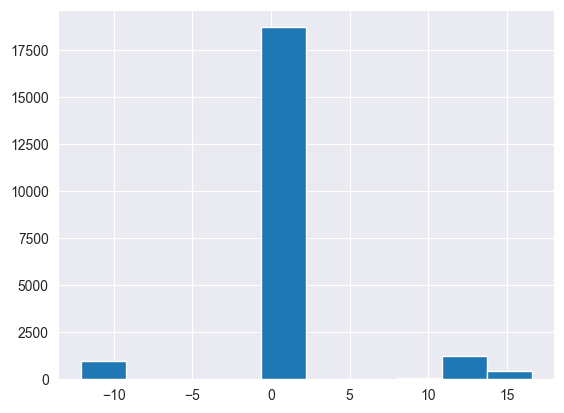

Text(0.5, 1.0, 'Distribution of net_investment_log')

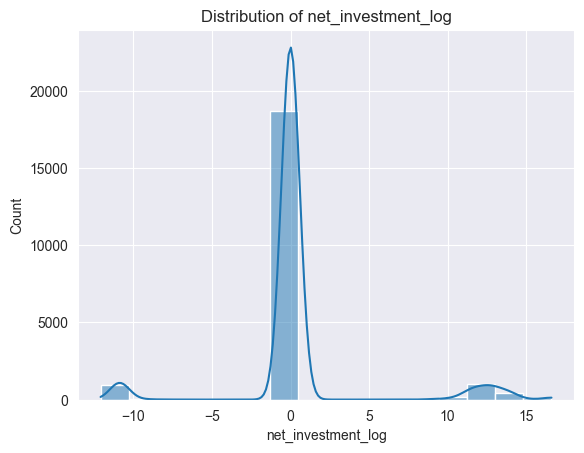

In [7]:
X_train['log_gain'] = np.log2(X_train['Investment_Gain'] + 1)
X_train['log_loss'] = np.log2(X_train['Investment_Loss'] + 1)
X_train['net_investment_log'] = X_train['log_gain'] - X_train['log_loss']

plt.hist(X_train['net_investment_log'])
plt.show()

sns.histplot(X_train['net_investment_log'].dropna(), kde=True)
plt.title(f"Distribution of net_investment_log")

In [8]:
X_test['log_gain'] = np.log2(X_test['Investment_Gain'] + 1)
X_test['log_loss'] = np.log2(X_test['Investment_Loss'] + 1)
X_test['net_investment_log'] = X_test['log_gain'] - X_test['log_loss']

In [9]:
X_train["A_log"] = np.log1p(X_train["A"])
X_test["A_log"] = np.log1p(X_test["A"])


In [10]:
# List of numeric features we care about
features = [
    "net_investment_log",
    "Weekly_Work_Hours",
    "Years_of_Education",
    "Age",
    "A_log",
    "D",
    "E",
    "Investment_Gain",
    "Investment_Loss"
]

# Compute the five‐number summary (min, Q1, median, Q3, max) for each feature
summary = X_train[features].quantile([0.00, 0.25, 0.50, 0.75, 1.00]).T
summary.columns = ["Min", "Q1", "Median", "Q3", "Max"]
summary_int = summary.round(0).astype(int)

print(summary_int)

                    Min   Q1  Median   Q3    Max
net_investment_log  -12    0       0    0     17
Weekly_Work_Hours     1   40      40   45     99
Years_of_Education    1    9      10   12     16
Age                  17   28      37   48     90
A_log                10   12      12   12     14
D                    -2    4       5    6     11
E                    83  130     139  149    199
Investment_Gain       0    0       0    0  99999
Investment_Loss       0    0       0    0   4356


In [11]:
# Remove outliers from 'net_investment_log' using 3 standard deviations
mean_log = X_train["net_investment_log"].mean()
std_log  = X_train["net_investment_log"].std()
lower  = mean_log - 4 * std_log
upper  = mean_log + 4 * std_log
X_train = X_train[(X_train["net_investment_log"] >= lower) & (X_train["net_investment_log"] <= upper)]


mean_A = X_train["A_log"].mean()
std_A  = X_train["A_log"].std()
lower_A  = mean_A - 3 * std_A
upper_A  = mean_A + 3 * std_A
X_train = X_train[(X_train["A_log"] >= lower_A) & (X_train["A_log"] <= upper_A)]


# Keep only values between 1 and 9 for column 'D'
X_train = X_train[(X_train["D"] >= 0) & (X_train["D"] <= 9)]

In [12]:
# Compute 99th percentile
p99 = X_train["Weekly_Work_Hours"].quantile(0.99)

# Remove rows where Weekly_Work_Hours > 99th percentile
X_train = X_train[X_train["Weekly_Work_Hours"] <= p99]

# print new max for verification
print("New max after filtering:", X_train["Weekly_Work_Hours"].max())
print("99th percentile used as threshold:", p99)

New max after filtering: 80
99th percentile used as threshold: 80.0


In [13]:
X_train.shape

(21103, 22)

We created a new feature, Net_Investment, by subtracting investment losses from gains, to capture the overall investment outcome.
We applied a log transformation to Net_Investment to reduce skew and compress extreme outliers.


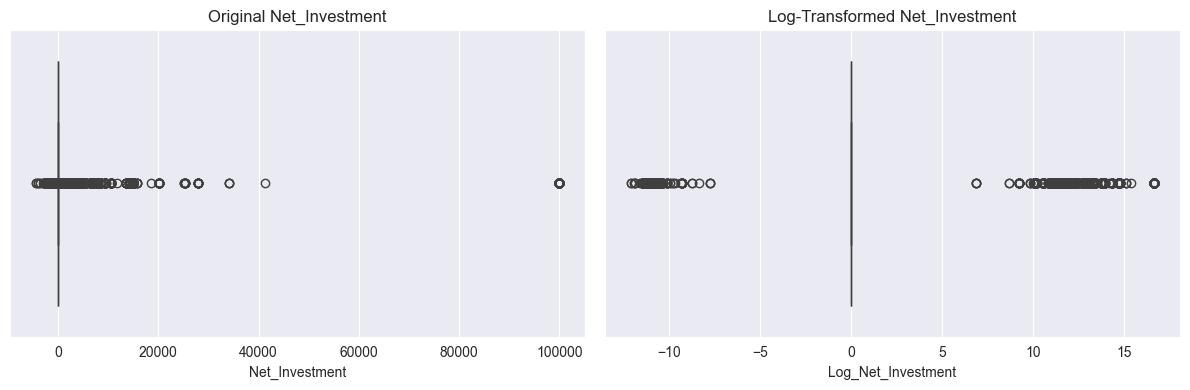

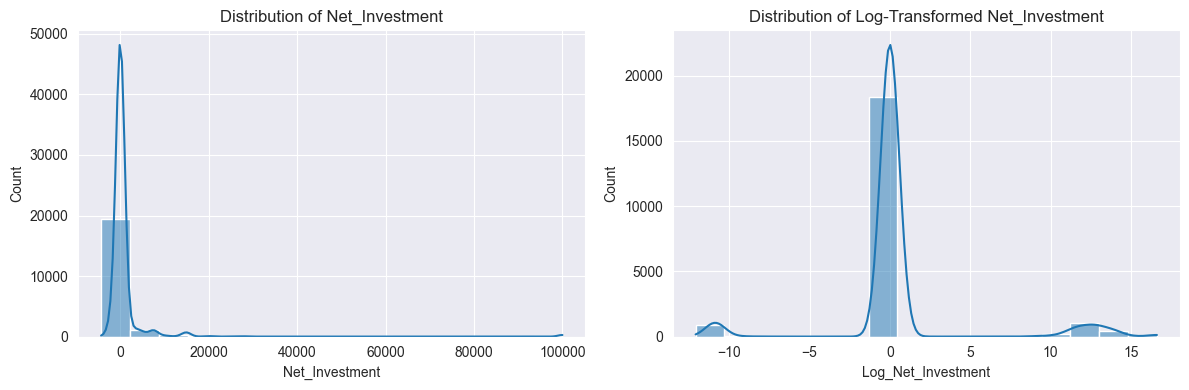

In [14]:
#Doing a log transformation while still distinguishing losses vs. gains.
X_train['Net_Investment'] = X_train['Investment_Gain'] - X_train['Investment_Loss']
X_test['Net_Investment'] = X_test['Investment_Gain'] - test['Investment_Loss']


X_train['Log_Net_Investment'] = np.sign(X_train['Net_Investment']) * np.log2(abs(X_train['Net_Investment']) + 1)
X_test['Log_Net_Investment'] = np.sign(X_test['Net_Investment']) * np.log2(abs(X_test['Net_Investment']) + 1)


# Side-by-side boxplots 
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x=X_train['Net_Investment'], ax=axes[0])
axes[0].set_title('Original Net_Investment')
axes[0].set_xlabel('Net_Investment')

sns.boxplot(x=X_train['Log_Net_Investment'], ax=axes[1])
axes[1].set_title('Log-Transformed Net_Investment')
axes[1].set_xlabel('Log_Net_Investment')

plt.tight_layout()
plt.show()

# Side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(X_train['Net_Investment'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribution of Net_Investment')
axes[0].set_xlabel('Net_Investment')

sns.histplot(X_train['Log_Net_Investment'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribution of Log-Transformed Net_Investment')
axes[1].set_xlabel('Log_Net_Investment')

plt.tight_layout()
plt.show()

This cell defines helper functions to collapse rarely seen categories into broader groups, reducing cardinality for certain columns.
These functions prepare us to reduce the number of dummy columns later on when we one-hot encode.

In [15]:
# ------------ Grouping functions ------------

# Grouping Preferred_Communication_Method
def group_pref_com(pref):
    if pref == "Mail" or pref == "mail":
        return "Mail"
    if pref == "Email" or pref == "email":
        return "EMail"
    if pref == "Phone" or pref == "phone" or pref == "phone call":
        return "Phone"
    else:
        return "Other"

# Grouping Country_of_Residence
def group_country(country):
    if country == "United-States":
        return "USA"
    elif country == "Mexico":
        return "Mexico"
    else:
        return "Other"
    
# Grouping Education_Level
def group_education(edu):
    pre_school = ['Preschool']
    school = ['1st-4th', '5th-6th', '9th', '10th', '11th', '12th', '7th-8th']
    post_hs = ['HS-grad', 'Some-college']
    assoc = ['Assoc-voc', 'Assoc-acdm']
    higher = ['Masters', 'Bachelors']
    postgraduate = ['Doctorate', 'Prof-school']
    
    if edu in pre_school:
        return 'pre_school'
    elif edu in school:
        return 'school'
    elif edu in post_hs:
        return 'post_hs'
    elif edu in assoc:
        return 'assoc'
    elif edu in higher:
        return 'higher'
    elif edu in postgraduate:
        return 'postgraduate'
    else:
        return 'Other'
    
# Grouping Household_role
def group_household_role(role):
    if role in ['Husband', 'Wife']:
        return 'Spouse'
    else:
        return 'Other'

# Grouping Employment_Type
def group_employment(emp):
    if emp == 'Private':
        return 'Private'
    elif emp in ['Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'State-gov', 'Federal-gov']:
        return 'Not-Private'
    elif emp in ['Without-pay', 'Never-worked']:
        return 'Non-working'
    else:
        return 'Other'
    
# Grouping Ethnicity:
def group_ethnicity(eth):
    if eth == 'White':
        return 'White'
    elif eth == 'Black':
        return 'Black'
    else:
        return 'Other'
    
# 1. Mapping dictionary for Years_of_Education
edu_to_years = {
    'Preschool'    : 0,
    '1st-4th'      : (1 + 2 + 3 + 4) / 4,
    '5th-6th'      : 5.5,
    '7th-8th'      : 7.5,
    '9th'          : 9,
    '10th'         : 10,
    '11th'         : 11,
    '12th'         : 12,
    'HS-grad'      : 12,
    'Some-college' : (12 + 13 + 14 + 15) / 4,
    'Assoc-voc'    : 14,
    'Assoc-acdm'   : 14,
    'Bachelors'    : 16,
    'Masters'      : 18,
    'Prof-school'  : 19,
    'Doctorate'    : 20
}


def group_edu_years(X):
    # Ensure X is treated as a 2D array
    arr = X.to_numpy()
    
    if arr.ndim != 2 or arr.shape[1] != 2:
        raise ValueError("group_edu_years expects exactly 2 columns: [Years_of_Education, Education_Level]")
    
    # Now arr[:, 0] and arr[:, 1] work as intended
    raw_years   = pd.Series(arr[:, 0])
    raw_levels  = pd.Series(arr[:, 1])
    
    # Map Education_Level → numeric years
    mapped_years = raw_levels.map(edu_to_years)
    
    # Fill NaN in raw_years with mapped_years
    filled = raw_years.fillna(mapped_years)
    
    # Return a single-column DataFrame
    return filled.to_frame(name="Years_of_Education")

def group_job_type(job):
    # 1. White-collar
    white = {
        "Exec-managerial", 
        "Prof-specialty", 
        "Adm-clerical", 
        "Sales", 
        "Tech-support"
    }
    # 2. Blue-collar
    blue = {
        "Craft-repair",
        "Machine-op-inspct",
        "Transport-moving",
        "Handlers-cleaners",
        "Farming-fishing",
        "Protective-serv"
    }
    # 3. Service
    service = {
        "Other-service",
        "Priv-house-serv"
    }
    # 4. Military
    military = {"Armed-forces"}

    if job in white:
        return "White-collar"
    elif job in blue:
        return "Blue-collar"
    elif job in service:
        return "Service"
    elif job in military:
        return "Military"
    else:
        return "Other"

In [16]:
from sklearn.preprocessing import FunctionTransformer
import pandas as pd


pref_com_group = FunctionTransformer(
    func=lambda X: pd.Series(
        X.to_numpy().ravel()
    ).map(group_pref_com).to_frame("Preferred_Communication_Method"),
    validate=False
)

country_group = FunctionTransformer(
    func=lambda X: pd.Series(
        X.to_numpy().ravel()
    ).map(group_country).to_frame("Country_of_Residence"),
    validate=False
)

edu_level_group = FunctionTransformer(
    func=lambda X: pd.Series(
        X.to_numpy().ravel()
    ).map(group_education).to_frame("Education_Level_Mapped"),
    validate=False
)

house_hold_group = FunctionTransformer(
    func=lambda X: pd.Series(
        X.to_numpy().ravel()
    ).map(group_household_role).to_frame("Household_Role"),
    validate=False
)

emp_type_group = FunctionTransformer(
    func=lambda X: pd.Series(
        X.to_numpy().ravel()
    ).map(group_employment).to_frame("Employment_Type"),
    validate=False
)

ethnicity_group = FunctionTransformer(
    func=lambda X: pd.Series(
        X.to_numpy().ravel()
    ).map(group_ethnicity).to_frame("Ethnicity"),
    validate=False
)

job_type_group = FunctionTransformer(
    func=lambda X: pd.Series(
        X.to_numpy().ravel()
    ).map(group_job_type).to_frame("job_type"),
    validate=False
)

# 2. Two-column grouper: 
#    X will be shape (n_samples, 2), where column 0 = Years_of_Education,
#    column 1 = Education_Level. We need to call group_edu_years on each row.

edu_years_group = FunctionTransformer(
    func=lambda X: group_edu_years(X),
    validate=False
)

In [17]:
# ------------ pipelines ------------

# Preferred_Communication_Method pipeline
pref_pipeline = Pipeline([
    ('group', pref_com_group),  
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Country_of_Residence pipeline
country_pipeline = Pipeline([
    ('group', country_group),
    ('impute', SimpleImputer(strategy='most_frequent')),  # or 'constant' if you prefer
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Education_Level pipeline
edu_pipeline = Pipeline([
    ('group', edu_level_group),
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Employment_Type pipeline
employment_pipeline = Pipeline([
    ('group', emp_type_group),
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Ethnicity pipeline
ethnicity_pipeline = Pipeline([
    ('group', ethnicity_group),
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Household pipeline
Household_pipeline = Pipeline([
    ('group', house_hold_group),
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Household pipeline
job_type_pipeline = Pipeline([
    ('group', job_type_group),
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Years of education pipeline
edu_years_pipeline = Pipeline([
    ('fill_years', edu_years_group),
    ('impute_years', SimpleImputer(strategy='mean')),
    ("scaler", StandardScaler()), 
])


# columns without special adjustments:
categorical_col = ['Gender', 'Marital_Status', 'Job_Type', 'Employment_Type']
numerical_col = ['E']
skw_numerical_col = ['Age', 'Investment_Gain', 'Investment_Loss']

# Pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline for numerical features (mean imputation)
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ("scaler", StandardScaler()), 

])

# Pipeline for numerical features (median imputation) - for skewed columns
skw_numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()), 
])

# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer([
    ('pref_communication', pref_pipeline,         ['Preferred_Communication_Method']),
    ('country',            country_pipeline,      ['Country_of_Residence']),
    ('edu_level',          edu_pipeline,          ['Education_Level']),
    ('edu_years',          edu_years_pipeline,    ['Years_of_Education', 'Education_Level']),
    ('employment_type',    employment_pipeline,   ['Employment_Type']),
    ('ethnicity',          ethnicity_pipeline,    ['Ethnicity']),
    ('job_type',           job_type_pipeline,     ['Job_Type']),
    ('household_role',     Household_pipeline,    ['Household_Role']),
    ('cat',                cat_pipeline,          ['Gender', 'Marital_Status']), # Other categorical columns
    ('num',                num_pipeline,          ['E', 'Log_Net_Investment', 'log_gain', 'log_loss', 'net_investment_log']),     # Simple numeric column
    ('skw_num',            skw_numerical_pipeline,['Age', 'Investment_Gain', 'Investment_Loss', 'Net_Investment'])                # Skewed numeric columns    
    ],
    remainder="passthrough"
    # All remaining columns that were not specified in transformer. These columns don't need any transformation. This subset of columns is concatenated with the output of the transformers.
)

## 4. Feature Selection



In here we begin by preprocessing our training and test data — handling imputation, encoding and scaling. Next, we fit RFECV selectors for each model, each identifying its own optimal subset of features. Finally, we evaluate all of our candidate models (LR, SVM, RF, MLP) on the feature‐selected datasets: for each model, we run a GridSearchCV to tune hyperparameters, fit on the selected features, and report ROC‐AUC on the training set and final ROC‐AUC on the hold‐out test set.

In [18]:
# 1) Preprocess once
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc  = preprocessor.transform(X_test)
y_train = y_train.loc[X_train.index]

In [ ]:
# — LR selector
sel_lr = RFECV(
    estimator=LogisticRegression(solver='liblinear', max_iter=2000, random_state=42, penalty='l2', class_weight='balanced'),
    cv=StratifiedKFold(5), scoring='roc_auc', min_features_to_select=5,
    step=1, n_jobs=-1, verbose=1
)


sel_lr.fit(X_train_proc, y_train)
mask_lr = sel_lr.get_support()

In [27]:
# — RF selector
sel_rf = RFECV(
    estimator=RandomForestClassifier(n_estimators=50, random_state=42, criterion='entropy'),
    cv=StratifiedKFold(3), scoring='roc_auc', min_features_to_select=5,
    step=1, n_jobs=-1, verbose=1
)
sel_rf.fit(X_train_proc, y_train)
mask_rf = sel_rf.get_support()

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.


In [ ]:
# — SVM selector

# — RFECV selector powered by a LinearSVC (so coef_ is available)
sel_svm = RFECV(
    estimator=LinearSVC(
        penalty='l2',
        dual=False,
        max_iter=5000,
        random_state=42
    ),
    cv=StratifiedKFold(3),
    scoring='roc_auc',
    min_features_to_select=5,
    step=1,
    n_jobs=-1,
    verbose=1
)

# — Fit the selector
sel_svm.fit(X_train_proc, y_train)

# — Extract the mask
mask_svm = sel_svm.get_support()

In [38]:
# — MLP selector

# 2) RFECV selector with custom importance_getter that takes only the estimator
rfecv_mlp = RFECV(
    estimator=MLPClassifier(
        hidden_layer_sizes=(50,),
        activation='relu',
        solver='adam',
        alpha=1e-4,
        learning_rate_init=1e-3,
        max_iter=2000,
        early_stopping=True,
        random_state=42
    ),
    # single‐arg getter: average absolute weights of first layer
    importance_getter=lambda est: np.mean(np.abs(est.coefs_[0]), axis=1),
    step=1,
    cv=StratifiedKFold(5),
    scoring='roc_auc',
    min_features_to_select=5,
    n_jobs=-1,
    verbose=1
)

# 3) Fit selector and extract mask
rfecv_mlp.fit(X_train_proc, y_train)
mask_mlp = rfecv_mlp.get_support()

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.


In [39]:
# 3) Prepare train/test splits for each selector
datasets = {
    #'LR-selected': (X_train_proc[:, mask_lr], X_test_proc[:, mask_lr]),
    'RF-selected': (X_train_proc[:, mask_rf], X_test_proc[:, mask_rf]),
    'MLP-selected': (X_train_proc[:, mask_mlp], X_test_proc[:, mask_mlp]),
   # 'SVM-selected': (X_train_proc[:, mask_svm], X_test_proc[:, mask_svm]),
}

## 4. Model Training – Basic Models

## models - logistic regression


In [46]:
#--- Grid search - logistic regression ---

# unpack the LR-selected splits
X_tr_lr, X_te_lr = datasets['LR-selected']

# Define the range of C values to search 
param_grid_lr = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}

# set up GridSearchCV
grid_lr_lr = GridSearchCV(
    estimator=LogisticRegression(
        penalty='l2',
        solver='liblinear',
        class_weight='balanced',
        max_iter=2000,
        random_state=42
    ),
    param_grid=param_grid_lr,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# fit on training data
grid_lr_lr.fit(X_tr_lr, y_train)

# print the best hyperparameters and CV score
print("LR-select → LR: Best C =", grid_lr_lr.best_params_['C'])
print("LR-select → LR: Best CV ROC-AUC =", round(grid_lr_lr.best_score_, 3))

# evaluate on the hold-out test set
y_pred = grid_lr_lr.predict(X_te_lr)
y_proba = grid_lr_lr.predict_proba(X_te_lr)[:, 1]

print("\nTest ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))
print(classification_report(y_test, y_pred))

KeyError: 'LR-selected'

## 5. Model Training – Advanced Models


## models - random forest


In [31]:
#--- Grid search - random forest ---

# unpack RF-selected
X_tr, X_te = datasets['RF-selected']

'''
param_grid = param_grid_rf = {
    'n_estimators':       [100, 1000],
    'min_samples_split':  [2, 10],
    'min_samples_leaf':   [1, 4],
    'criterion':          ['gini', 'entropy'],

}
'''
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    # number of trees
    'n_estimators':       [100, 1500, 2000],
    'max_depth':          [None, 15],
    'criterion':          ['gini', 'entropy'],
}

rf = RandomForestClassifier(random_state=42)


grid_rf_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, ),
    param_grid=param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_rf_rf.fit(X_tr, y_train)

print("RF-selected → RF: Best params =", grid_rf_rf.best_params_)
print("RF-selected → RF: Best CV ROC-AUC =", round(grid_rf_rf.best_score_, 3))

y_pred  = grid_rf_rf.predict(X_te)
y_proba = grid_rf_rf.predict_proba(X_te)[:,1]
print("Test ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
RF-selected → RF: Best params = {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 2000}
RF-selected → RF: Best CV ROC-AUC = 0.917
Test ROC-AUC: 0.926
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4191
           1       0.80      0.60      0.69      1345

    accuracy                           0.87      5536
   macro avg       0.84      0.78      0.80      5536
weighted avg       0.86      0.87      0.86      5536


## models - SVM

In [69]:
#--- Grid search - SVM ---

from sklearn.svm           import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics       import roc_auc_score, classification_report

# unpack
X_tr, X_te = datasets['SVM-selected']

# grid over C
param_grid = {'C': [0.1, 1, 10, 100]}

grid_svc = GridSearchCV(
    estimator=SVC(kernel='rbf', probability=True, random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_svc.fit(X_tr, y_train)
print("LR-selected → SVC: Best C =", grid_svc.best_params_['C'])
print("LR-selected → SVC: Best CV ROC-AUC =", round(grid_svc.best_score_, 3))

# test eval
y_pred  = grid_svc.predict(X_te)
y_proba = grid_svc.predict_proba(X_te)[:,1]
print("Test ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
LR-selected → SVC: Best C = 100
LR-selected → SVC: Best CV ROC-AUC = 0.898
Test ROC-AUC: 0.906
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4191
           1       0.77      0.55      0.65      1345

    accuracy                           0.85      5536
   macro avg       0.82      0.75      0.78      5536
weighted avg       0.85      0.85      0.84      5536


## models - neural network

In [40]:
#--- Grid search - MLP ---

# — Unpack your MLP‐selected datasets
X_tr_mlp, X_te_mlp = datasets['MLP-selected']


# — Define a hyperparameter grid for the full‐sized network
param_grid_mlp =  {'activation' : ["logistic", "relu"], #
                      'hidden_layer_sizes' : [(100,), # 1 large hidden layer
                                              (200,), # 1 large hidden layer
                                             (50, 50), # 2 medium size layers
                                             (20, 20, 10, 10, 10)], # multiple small sized layers
                      'batch_size' : [10, 50, 70, 100],
                      'learning_rate_init' : [0.1, 0.01], 
} 
                     
# — Set up GridSearchCV on a bare MLPClassifier
grid_mlp = GridSearchCV(
    estimator=MLPClassifier(
        solver='adam',
        max_iter=5000,
        random_state=42,
        early_stopping=True
    ),
    param_grid=param_grid_mlp,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# — Fit on the MLP‐selected training features
grid_mlp.fit(X_tr_mlp, y_train)

# — Report the best parameters and CV score
print("MLP-selected → MLP: Best params =", grid_mlp.best_params_)
print("MLP-selected → MLP: Best CV ROC-AUC =", round(grid_mlp.best_score_, 3))

# — Evaluate the best model on the hold-out test set
y_pred  = grid_mlp.predict(X_te_mlp)
y_proba = grid_mlp.predict_proba(X_te_mlp)[:, 1]

print("Test ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
MLP-selected → MLP: Best params = {'activation': 'logistic', 'batch_size': 100, 'hidden_layer_sizes': (20, 20, 10, 10, 10), 'learning_rate_init': 0.01}
MLP-selected → MLP: Best CV ROC-AUC = 0.903
Test ROC-AUC: 0.912
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4191
           1       0.76      0.59      0.66      1345

    accuracy                           0.85      5536
   macro avg       0.82      0.77      0.79      5536
weighted avg       0.85      0.85      0.85      5536


logistic regression results:
Best CV ROC-AUC = 0.896
Test ROC-AUC: 0.903

Random Forest results:
Best CV ROC-AUC = 0.916
Test ROC-AUC: 0.924

SVM results: 
Best CV ROC-AUC = 0.898
Test ROC-AUC: 0.906

neural network:
Best CV ROC-AUC = 0.903
Test ROC-AUC: 0.912

## 6. Evaluation - bluh bluh
- Build confusion matrix for at least one model
- Generate ROC curves (using K-Fold CV)
- Report AUC

**✏️ Answer in markdown:**
- Does any model overfit?
- Which model generalizes best?
- Final choice justification

## 7. Final Prediction on Test Set
_Predict probabilities (not binary labels!) and create submission file._

In [57]:
# Example:
# final_model.predict_proba(test)[:, 1]  # ← probability of 'approved'
# submission = pd.DataFrame({
#     'customer_id': test['customer_id'],
#     'loan_approval': predictions
# })
# submission.to_csv('Submission_group_32.csv', index=False)

## 8. Appendix / Extra Notes
_Use this area for extra analysis, failed attempts, or ideas you explored._

We tried to handle the missing values with linear regression, but R^2 was 0.02, so we just impute with the median.
Trying:

In [ ]:
######## TRY AGAIN AFTER ADDING AGE
'''
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

df = train  

# 1. Define features & split known vs missing
features = ['Weekly_Work_Hours', 'Years_of_Education', 'Age']
known   = df[df['Investment_Gain'].notnull() ].copy()
missing = df[df['Investment_Gain'].isnull()].copy()

X_known = known[features]
y_known = known['Investment_Gain']

# 2. Hold out 20% for validation
X_tr, X_val, y_tr, y_val = train_test_split(
    X_known, y_known,
    test_size=0.2,
    random_state=42
)

# 3. Train on the 80%
lr = LinearRegression()
lr.fit(X_tr, y_tr)

# 4. Predict on the hold‐out and evaluate
y_pred = lr.predict(X_val)
print(f"R² on hold-out: {r2_score(y_val, y_pred):.3f}")
print(f"MAE on hold-out: {mean_absolute_error(y_val, y_pred):.3f}")

# 5. (Optional) Retrain on ALL known data and impute missings
lr_full = LinearRegression()
lr_full.fit(X_known, y_known)

X_missing = missing[features]
df.loc[df['Investment_Gain'].isnull(), 'Investment_Gain'] = lr_full.predict(X_missing)
'''


we tried to look at crosstabs of explanatory variables vs. loan approval, but it didnt really help because of the unbalanced proportions:

In [ ]:
pd.crosstab(train['Loan_Approval'], train['Gender'], normalize='index')
pd.crosstab(train['Loan_Approval'], train['Ethnicity'], normalize='index')
pd.crosstab(train['Loan_Approval'], train['Education_Level'], normalize='index')